# Machine Learning CLassification Models for Universal Bank Loan dataset


## Load the data set and check the features

In [13]:
#Create bunch object containing iris dataset and its attributes.
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
Loan_data=pd.read_excel("Universal Bank Customer Profiles Data.xlsx",sheet_name="data") 

In [14]:
Loan_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [15]:
Loan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [16]:
#remove unnecessary attributes from the  data
Loan_data.drop(["ID", "ZIP Code"],axis = 1, inplace = True) 
Loan_data.head()             

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [17]:
Loan_data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [18]:
#Seggregating Input and output. X is feature matrix , y in response /target vector
X=Loan_data[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']]
y=Loan_data['Personal Loan']

In [19]:
#Integers representing the personal loan: 0 = No, 1 = Yes
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64


In [24]:
# we have a total of 5000 observations and 11 features
print(X.shape)
print(y.shape)

(5000, 11)
(5000,)


# Train the Model 

In [25]:
# splitting the data into training and test sets (80:20)
# when random_state set to an integer, train_test_split will return same results for each execution.
# when random_state set to an None, train_test_split will return different results for each execution.


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [26]:
#shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(4000, 11)
(1000, 11)


In [27]:
# shape of new y objects
print(y_train.shape)
print(y_test.shape)

(4000,)
(1000,)


### Logistic Regression

In [28]:
### Import fucntions for Model Evaluation 

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression


In [29]:
## Train the Logistic Regression Model and Predcit for test data




logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


C:\Users\Bliss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.95
[[905   7]
 [ 41  47]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       912
           1       0.87      0.53      0.66        88

    accuracy                           0.95      1000
   macro avg       0.91      0.76      0.82      1000
weighted avg       0.95      0.95      0.95      1000

0.952


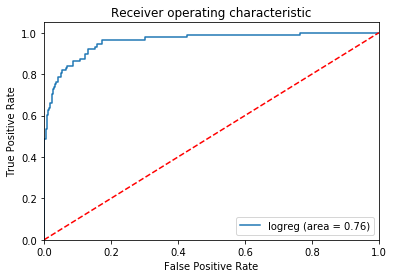

In [30]:
##########Generating AUC plot and ROC curve#############
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='logreg (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### KNN Classifier

In [42]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [43]:
#Testing accuracy for each value of K
scores

{1: 0.913,
 2: 0.915,
 3: 0.914,
 4: 0.915,
 5: 0.908,
 6: 0.913,
 7: 0.909,
 8: 0.915,
 9: 0.91,
 10: 0.913,
 11: 0.915,
 12: 0.912,
 13: 0.913,
 14: 0.914,
 15: 0.913,
 16: 0.912,
 17: 0.912,
 18: 0.911,
 19: 0.913,
 20: 0.913,
 21: 0.911,
 22: 0.913,
 23: 0.912,
 24: 0.911,
 25: 0.913}

Text(0, 0.5, 'Testing Accuracy')

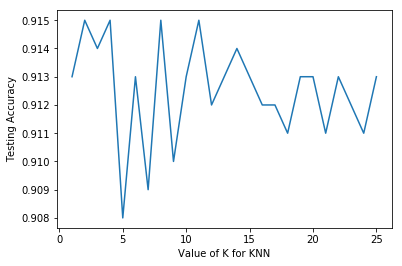

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [45]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred)) 
print(accuracy_score(y_test, y_pred))


[[898  14]
 [ 71  17]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       912
           1       0.55      0.19      0.29        88

    accuracy                           0.92      1000
   macro avg       0.74      0.59      0.62      1000
weighted avg       0.89      0.92      0.90      1000

0.915


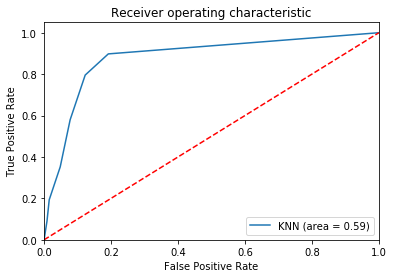

In [46]:
##########Generating AUC plot and ROC curve#############
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Running Navie Bayes algorithm

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection

In [48]:
# Initialize Gaussian Naive Bayes
clf = GaussianNB()
seed=7

# Test options and evaluation metric
scoring = 'accuracy'

# Fitting the training set
clf.fit(X_train, y_train)

# Predicting for the Test Set
pred_clf = clf.predict(X_test)

# Prediction Probability
prob_pos_clf = clf.predict_proba(X_test)[:, 1]

# Model Performance
# setting performance parameters
print(confusion_matrix(y_test,pred_clf))  
print(classification_report(y_test,pred_clf))  
print(accuracy_score(y_test, pred_clf))  

[[843  69]
 [ 33  55]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       912
           1       0.44      0.62      0.52        88

    accuracy                           0.90      1000
   macro avg       0.70      0.77      0.73      1000
weighted avg       0.92      0.90      0.91      1000

0.898


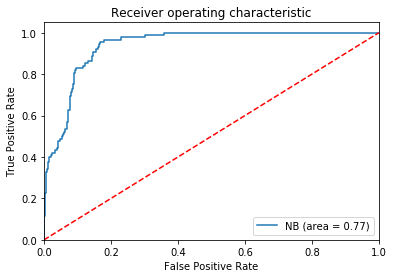

In [49]:
##########Generating AUC plot and ROC curve#############
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
nb_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Running Decision Tree analysis 

In [50]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

Model accuracy :  0.987
[[903   9]
 [  4  84]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       912
           1       0.90      0.95      0.93        88

    accuracy                           0.99      1000
   macro avg       0.95      0.97      0.96      1000
weighted avg       0.99      0.99      0.99      1000

0.987


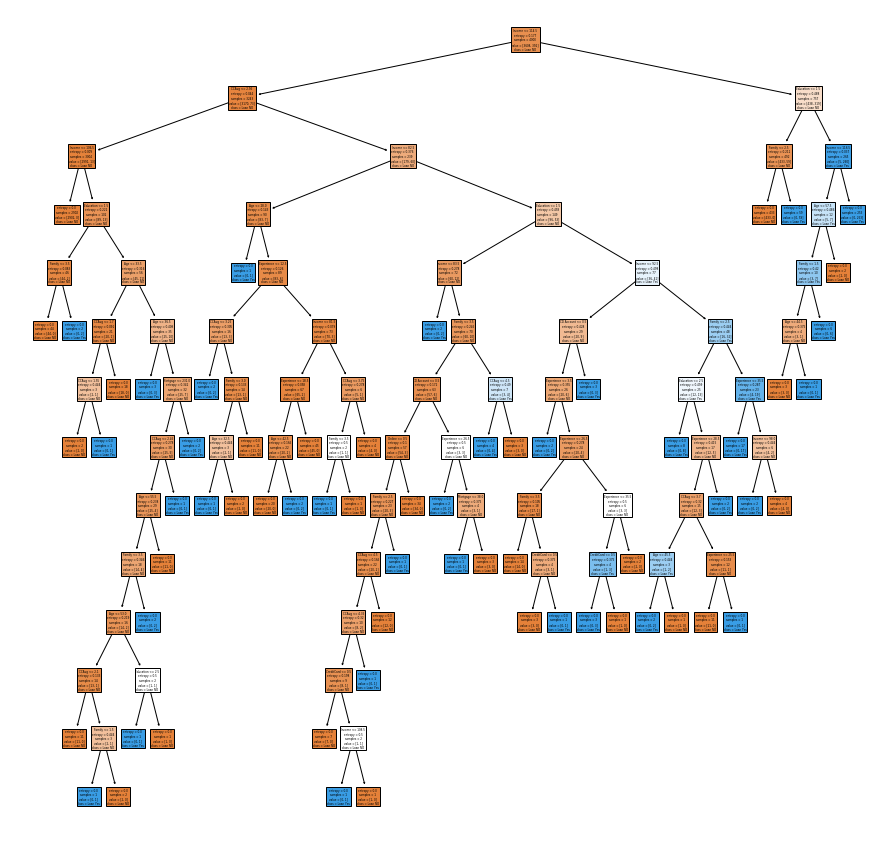

In [51]:
plt.figure(figsize=[15,15])
#max_depth=3
clf_dt = DecisionTreeClassifier().fit(X_train, y_train)

y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)

print('Model accuracy : ', score)
# setting performance parameters
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred)) 
plot_tree(clf_dt, filled=True,feature_names=X.columns,class_names=['Loan NO','Loan Yes'])
plt.show()

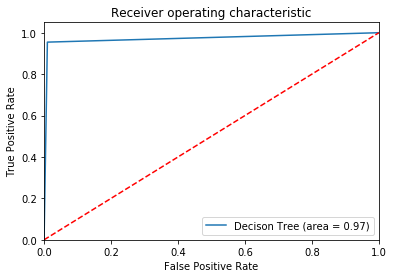

In [52]:
##########Generating AUC plot and ROC curve#############
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
nb_roc_auc = roc_auc_score(y_test, clf_dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decison Tree (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [54]:
### Predicting for Unseen Data
unseen_data=pd.read_excel("D:/courses/BDM_DM/Classification/Universal Bank Customer Profiles Data.xlsx",sheet_name='unseen') 

In [55]:
unseen_data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,5001,40,10,84,91711,2,2,2,0,?,0,0,1,1
1,5002,35,6,44,91351,3,3,1,0,?,1,0,1,1


In [58]:
unseen_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [60]:
unseen_data.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [63]:
X_unseen=unseen_data[['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage','Securities Account',
       'CD Account', 'Online', 'CreditCard']]

In [64]:
unseen_data['Personal Loan']=clf_dt.predict(X_unseen)

In [65]:
unseen_data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,40,10,84,2,2,2,0,0,0,0,1,1
1,35,6,44,3,3,1,0,1,1,0,1,1
